### DATASET ANALYSIS

In [2]:
import pandas as pd
df_metadata = pd.read_csv("../dataset/dataset_scenario_2.csv")

In [9]:
df_metadata.head()

,user_id,study_id,study_description,modalities,series_id,file_url,report_id,field_value
0,39390ffe-96b2-4737-89ad-b8fec46b01af,512b9fef-5f43-400c-a555-bdc9f982beeb,RX DE TÓRAX POSTERO-ANTERIOR,DX,56b04926-daba-42d5-91e6-3cfed5c822f2,images/56b04926-daba-42d5-91e6-3cfed5c822f2.dcm,2eecba66-e256-44a2-8f17-718d91d93f36,"<p style=""text-align: justify;""><a name=""OLE_L..."
1,5a00607d-871d-41ea-b006-48eb592ab56d,df260956-03c0-4166-a48d-916b38783e35,RX DE TÓRAX POSTERO-ANTERIOR,DX,d4e09fb6-4d22-4852-8a46-eadff3bb0a6b,images/d4e09fb6-4d22-4852-8a46-eadff3bb0a6b.dcm,2ff0a483-bd21-4f46-a97a-80304275b659,"<p class=""MsoNormal"">SE REALIZA RX DE TORAX EN..."
2,8a184fa0-1dbc-4e97-ad39-76ce90ec01bf,593bd520-3164-4808-b10d-847a0770f614,RX DE TÓRAX POSTERO-ANTERIOR,CR,02c9299a-fa97-4b57-ac24-0c42b078d843,images/02c9299a-fa97-4b57-ac24-0c42b078d843.dcm,563243d6-cb35-48b2-810e-a5712a8ad3c8,"<p class=""MsoNormal""><strong><span lang=""ES"" s..."
3,6e640233-c04d-42d5-84c6-862438941446,3721ff1b-55ba-4cd5-8d5f-ea8a3253d18b,RX DE TÓRAX POSTERO-ANTERIOR,DX,966547f2-1b2f-4ce9-934a-e1363578834c,images/966547f2-1b2f-4ce9-934a-e1363578834c.dcm,f9ccd110-3f41-40ae-8364-79b59bdf0c7c,"<p class=""MsoNormal"">SE REALIZA RX DE TORAX EN..."
4,56955ec2-8022-4293-96df-4f73503b55e1,5ae8bc4d-74f4-4314-8bfb-cb403d5d9e34,RX DE TÓRAX POSTERO-ANTERIOR,DX,e6d39808-414e-497a-a648-adc4c46afc6d,images/e6d39808-414e-497a-a648-adc4c46afc6d.dcm,d5350a7a-2f3b-4586-bbb3-b135bfbe19f1,<br />\n<p>Se realiza estudio solicitado: radi...


In [17]:
# se ejecuto el script escenario2-personalizacion-por-medico/generate_difference_in_reports.py el cual genera un json
# caseid_caseid de la diferencia entre semanticas
# Se muestran algunas diferencias entre las semanticas para hacer comentarios al respecto
import json

with open("../differences_medics.json", "r") as f:
    differences_json = json.load(f)

In [18]:
# Imprimir un set de jsons para compartirlos a gemini y obtener un mensaje general de las diferencias
import numpy as np
selected_keys = np.random.choice(list(differences_json.keys()), 10)

In [21]:
prompt = f"Analiza los siguientes JSONS que describen diferencias entre estilos de medicos. Escribe unos parrafos con summaries y detalles:\n"

for cases_key in selected_keys:
    prompt += f"{differences_json[cases_key]}\n"

In [22]:
from src.utils.gemini import GeminiClient
from src.utils.config import config

gemini_client = GeminiClient(api_key=config["GEMINI_API_KEY"], gemini_model=config["GEMINI_MODEL"])

In [23]:
gemini_client.predict("", prompt, 0., None)

'Basado en el análisis de los JSONs proporcionados, se observa una clara dicotomía en los estilos de redacción médica, que puede resumirse en un contraste entre un enfoque **Académico-Protocolario (predominante en el Médico A)** y un enfoque **Pragmático-Funcional (predominante en el Médico B)**.\n\nAquí presento un resumen detallado de los hallazgos:\n\n### Resumen General de Estilos\n\nEl análisis revela que la diferencia fundamental no radica solo en la longitud del texto, sino en la **intención comunicativa**. Mientras que uno busca la precisión descriptiva y la protección legal mediante la cautela (hedging), el otro prioriza la velocidad de lectura, la categorización inmediata de la patología y la asertividad.\n\n*   **El Médico A (El Académico/Cauteloso):** Tiende a utilizar un lenguaje más denso, con una sintaxis compleja basada en la voz pasiva ("se observa", "se aprecia") y construcciones subordinadas. Su enfoque es defensivo y educativo; justifica las limitaciones técnicas ("

In [24]:
# PROMPT PARA EXTRACCION DE SEMANTICA / PREFERENCIA ETC
print(_)

Basado en el análisis de los JSONs proporcionados, se observa una clara dicotomía en los estilos de redacción médica, que puede resumirse en un contraste entre un enfoque **Académico-Protocolario (predominante en el Médico A)** y un enfoque **Pragmático-Funcional (predominante en el Médico B)**.

Aquí presento un resumen detallado de los hallazgos:

### Resumen General de Estilos

El análisis revela que la diferencia fundamental no radica solo en la longitud del texto, sino en la **intención comunicativa**. Mientras que uno busca la precisión descriptiva y la protección legal mediante la cautela (hedging), el otro prioriza la velocidad de lectura, la categorización inmediata de la patología y la asertividad.

*   **El Médico A (El Académico/Cauteloso):** Tiende a utilizar un lenguaje más denso, con una sintaxis compleja basada en la voz pasiva ("se observa", "se aprecia") y construcciones subordinadas. Su enfoque es defensivo y educativo; justifica las limitaciones técnicas ("no valora

# ANALISIS DE LOS RESULTADOS USANDO AMBAS METRICAS

In [28]:
results_df = pd.read_csv("../dataset_generated_plus_comparison.csv")

In [29]:
results_df.head()

,user_id,study_id,study_description,modalities,series_id,file_url,report_id,field_value,cleaned_text,generated_report,metric1_json_generated,metric1_json_real,metric1_json_result,metric2_json_result
0,39390ffe-96b2-4737-89ad-b8fec46b01af,512b9fef-5f43-400c-a555-bdc9f982beeb,RX DE TÓRAX POSTERO-ANTERIOR,DX,56b04926-daba-42d5-91e6-3cfed5c822f2,images/56b04926-daba-42d5-91e6-3cfed5c822f2.dcm,2eecba66-e256-44a2-8f17-718d91d93f36,"<p style=""text-align: justify;""><a name=""OLE_L...",Se realizo Rx de tórax PA en donde se observa:...,Se realizo Rx de tórax PA en donde se observa:...,"```json\n{\n ""meta"": {\n ""report_type"": ""C...","```json\n{\n ""meta"": {\n ""report_type"": ""C...","{\n ""score"": 100,\n ""clinical_accuracy_statu...","```json\n{\n ""score"": 100,\n ""clinical_accur..."
1,5a00607d-871d-41ea-b006-48eb592ab56d,df260956-03c0-4166-a48d-916b38783e35,RX DE TÓRAX POSTERO-ANTERIOR,DX,d4e09fb6-4d22-4852-8a46-eadff3bb0a6b,images/d4e09fb6-4d22-4852-8a46-eadff3bb0a6b.dcm,2ff0a483-bd21-4f46-a97a-80304275b659,"<p class=""MsoNormal"">SE REALIZA RX DE TORAX EN...","SE REALIZA RX DE TORAX EN PROYECCIÓN PA, EN DO...","SE REALIZA RX DE TORAX EN PROYECCIÓN PA, EN DO...","```json\n{\n ""meta"": {\n ""report_type"": ""C...","```json\n{\n ""meta"": {\n ""report_type"": ""C...","{\n ""score"": 45,\n ""clinical_accuracy_status...","```json\n{\n ""score"": 45,\n ""clinical_accura..."
2,8a184fa0-1dbc-4e97-ad39-76ce90ec01bf,593bd520-3164-4808-b10d-847a0770f614,RX DE TÓRAX POSTERO-ANTERIOR,CR,02c9299a-fa97-4b57-ac24-0c42b078d843,images/02c9299a-fa97-4b57-ac24-0c42b078d843.dcm,563243d6-cb35-48b2-810e-a5712a8ad3c8,"<p class=""MsoNormal""><strong><span lang=""ES"" s...",CHEST X-RAY\nTechnique: Posteroanterior projec...,CHEST X-RAY\n\nTechnique:\nProyección postero-...,"```json\n{\n ""meta"": {\n ""report_type"": ""C...","```json\n{\n ""meta"": {\n ""report_type"": ""C...","{\n ""score"": 65,\n ""clinical_accuracy_status...","```json\n{\n ""score"": 70,\n ""clinical_accura..."
3,6e640233-c04d-42d5-84c6-862438941446,3721ff1b-55ba-4cd5-8d5f-ea8a3253d18b,RX DE TÓRAX POSTERO-ANTERIOR,DX,966547f2-1b2f-4ce9-934a-e1363578834c,images/966547f2-1b2f-4ce9-934a-e1363578834c.dcm,f9ccd110-3f41-40ae-8364-79b59bdf0c7c,"<p class=""MsoNormal"">SE REALIZA RX DE TORAX EN...","SE REALIZA RX DE TORAX EN PROYECCIÓN PA, EN DO...","SE REALIZA RX DE TORAX EN PROYECCIÓN PA, EN DO...","```json\n{\n ""meta"": {\n ""report_type"": ""C...","```json\n{\n ""meta"": {\n ""report_type"": ""C...","{\n ""score"": 30,\n ""clinical_accuracy_status...","```json\n{\n ""score"": 30,\n ""clinical_accura..."
4,56955ec2-8022-4293-96df-4f73503b55e1,5ae8bc4d-74f4-4314-8bfb-cb403d5d9e34,RX DE TÓRAX POSTERO-ANTERIOR,DX,e6d39808-414e-497a-a648-adc4c46afc6d,images/e6d39808-414e-497a-a648-adc4c46afc6d.dcm,d5350a7a-2f3b-4586-bbb3-b135bfbe19f1,<br />\n<p>Se realiza estudio solicitado: radi...,Se realiza estudio solicitado: radiografía de ...,Se realiza estudio solicitado: radiografía de ...,"```json\n{\n ""meta"": {\n ""report_type"": ""C...","```json\n{\n ""meta"": {\n ""report_type"": ""C...","{\n ""score"": 100,\n ""clinical_accuracy_statu...","```json\n{\n ""score"": 98,\n ""clinical_accura..."


In [32]:
results_df["metric1_json_result"].isna().sum() # 1 na

np.int64(1)

In [33]:
results_df = results_df.dropna(subset=["metric1_json_result"]).reset_index(drop=True)

In [38]:
import json
import matplotlib
import seaborn as sbn
sbn.set_style("whitegrid")
results_df["metric1_clinical_accuracy"] = results_df["metric1_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["clinical_accuracy_status"])
results_df["metric1_score"]= results_df["metric1_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["score"])
results_df["metric1_missed_findings"]= results_df["metric1_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["missed_findings"])
results_df["metric1_hallucinations"]= results_df["metric1_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["hallucinations"])


In [39]:
results_df["metric1_clinical_accuracy"].value_counts()

metric1_clinical_accuracy
CORRECT           10
CRITICAL_ERROR    10
MINOR_ERROR        4
Name: count, dtype: int64

<Axes: xlabel='metric1_score'>

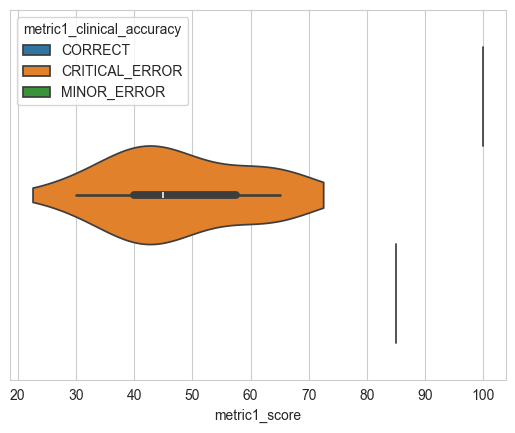

In [40]:
sbn.violinplot(results_df, x="metric1_score", hue="metric1_clinical_accuracy", cut=True)

Se puede observar que los errores criticos tienen distintos scores

In [42]:
results_df["metric2_clinical_accuracy"] = results_df["metric2_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["clinical_accuracy_status"])
results_df["metric2_score"]= results_df["metric2_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["score"])
results_df["metric2_missed_findings"]= results_df["metric2_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["missed_findings"])
results_df["metric2_hallucinations"]= results_df["metric2_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["hallucinations"])


In [43]:
results_df["metric2_clinical_accuracy"].value_counts()

metric2_clinical_accuracy
CORRECT           12
CRITICAL_ERROR     9
MINOR_ERROR        3
Name: count, dtype: int64